# Preprocessing

[https://www.kaggle.com/competitions/rsna-pneumonia-detection-challenge/](https://www.kaggle.com/competitions/rsna-pneumonia-detection-challenge/)

## Imports

In [6]:
import os
import sys

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import cv2
import pydicom

## Install Kaggle API to download competition data

In [7]:
pip install -q kaggle

In [8]:
os.environ["KAGGLE_USERNAME"] = "zahedgolabi"
os.environ["KAGGLE_KEY"] = "####################"

In [9]:
!kaggle competitions download -c rsna-pneumonia-detection-challenge

100% 3.66G/3.66G [00:47<00:00, 143MB/s]
100% 3.66G/3.66G [00:47<00:00, 82.8MB/s]


In [11]:
!unzip -q -o rsna-pneumonia-detection-challenge.zip -d datasets

## Train Test Data

In [12]:
labels = pd.read_csv("/content/datasets/stage_2_train_labels.csv")

In [14]:
labels.sample(4)

,patientId,x,y,width,height,Target
12364,7e5673a6-f9fd-40ee-87b3-bea2c84a0575,NaN,NaN,NaN,NaN,0
1564,17042665-a8a3-4538-a665-39126634f3dc,NaN,NaN,NaN,NaN,0
1223,10866808-61ec-41fa-aefd-89eedfbaec04,670.0,420.0,219.0,386.0,1
20711,bcca16d2-1b10-4644-9724-701bb38c4790,NaN,NaN,NaN,NaN,0


In [15]:
len(labels)

30227

In [16]:
# remove duplicates
labels = labels.drop_duplicates("patientId")

In [17]:
len(labels)

26684

In [18]:
ROOT_PATH = Path("/content/datasets/stage_2_train_images/")
SAVE_PATH = Path("/content/Processed")

## Display some Images from Train

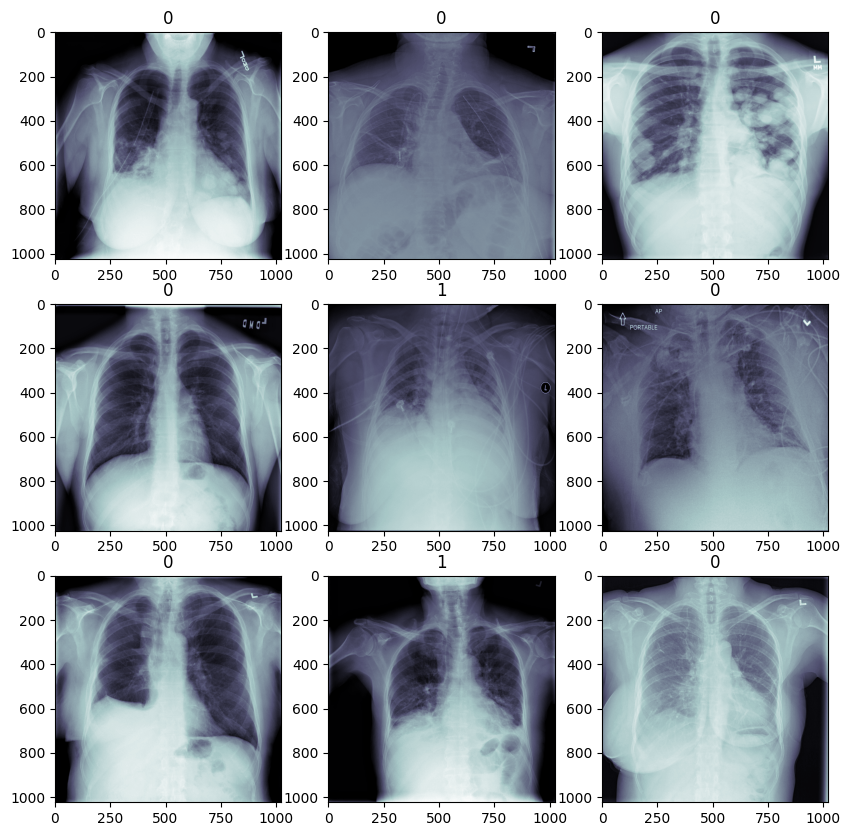

In [22]:
fig, axis = plt.subplots(3,3, figsize=(10,10))

counter = 0
for row in range(3):
  for column in range(3):

    patient_id = labels["patientId"].iloc[counter]
    dcm_path = ROOT_PATH/patient_id
    dcm_path = dcm_path.with_suffix(".dcm")
    dcm = pydicom.read_file(dcm_path).pixel_array

    label = labels["Target"].iloc[counter]

    axis[row][column].imshow(dcm, cmap="bone")
    axis[row][column].set_title(label)

    counter += 1